#### AI 헬스케어 첫번째 미니 프로젝트 “흡연 여부 데이터 분석을 통한 건강 인사이트 도출” 에 오신 1기 여러분 환영합니다.
이번 프로젝트에서는 흡연여부를 판단하는 데이터를 가지고 시각화 및 가설을 판별해보려고 합니다.


A-Z로 진행되는 만큼 천천히 따라해보세요!

#### 팀 과제
- 데이터 구조, 분포 확인, 전처리 : 1.1_흡연여부데이터
- 데이터 간 관계 가설 수립 및 검증 : 1.2_데이터분석



### 흡연여부데이터 분석하기
최근 여러 기관에서는 흡연이 개인의 건강에 미치는 영향을 정확히 파악하고,
이를 기반으로 예방 중심의 건강관리 정책을 수립하려는 노력을 강화하고 있습니다.

하지만 “흡연 여부”를 직접 조사하는 것은 현실적으로 쉽지 않습니다.
이에 따라, 건강검진 데이터를 통해 흡연 여부를 데이터 기반으로 추정하고,
흡연자와 비흡연자 간의 생체·건강 지표 차이를 검증하려는 프로젝트가 시작되었습니다.

여러분은 이 프로젝트의 데이터 분석가이자 AI 엔지니어로 참여하게 되었습니다.
주어진 데이터에는 개인의 건강검진 결과(혈압, 혈당, 콜레스테롤, BMI 등)와
흡연 여부(label = 0 또는 1)가 포함되어 있습니다.

이제 여러분의 역할은 흡연 여부 데이터의 특성을 분석하고 시각화하며,
통계적 검정을 통해 변수 간 관계를 규명하는 것입니다.
시작해봅시다 !

#### 🎯 프로젝트 목표

	•	흡연자와 비흡연자 간의 건강 지표 차이 분석
	•	주요 변수들의 분포, 상관관계, 통계적 유의성 검증
	•	시각화를 통한 데이터 인사이트 도출
	•	추후 흡연 여부 예측 모델 개발을 위한 기초 분석 기반 마련




---



### 1. 가설 수립 (인당 최소 3개)

건강 지표별로 흡연자/비흡연자 간 통계적 차이 검증

(예시)
- H₀ (귀무가설): BMI- 흡연자와 비흡연자의 평균 BMI는 같다.
- H₁ (대립가설): BMI- 흡연자와 비흡연자의 평균 BMI는 다르다.



- 키 데이터 기준으로 170cm 이상 구간에서 흡연자 비율이 높게 나타나,  
  **성별 정보 부재 시 키가 간접적 성별 지표로 작용할 수 있음**을 확인하였다.  
- 흡연자 그룹에서 **BMI 25 이상(과체중 이상)** 비율이 높아, 체격이 큰 흡연자 비중이 많을 가능성이 있다.  
- **중성지방, 혈청 크레아티닌, 헤모글로빈** 등은 흡연자 쪽 분포가 오른쪽으로 치우쳐 있으며,  
  비흡연자 대비 평균값이 높은 경향을 보였다.  
- 반면 **HDL(좋은 콜레스테롤)** 은 흡연자에서 낮은 분포를 보였고,  
  **간 효소율**은 비흡연자 쪽이 더 높게 나타났다.  
- **시력, 혈압, 공복혈당, 요 단백, 충치** 등은 그룹 간 차이가 뚜렷하지 않았다.


### 📋 주요 검정 항목
| 변수 | 검정 목적 | 기대 방향 |
|------|-------------|------------|
| BMI | 흡연자와 비흡연자 평균 차이 | 흡연자 ↑ |
| 혈압 | 흡연자와 비흡연자 평균 차이 | 흡연자 ↑ |
| 공복 혈당 | 흡연자와 비흡연자 평균 차이 | 흡연자 ↑ |
| 중성 지방 (log) | 흡연자와 비흡연자 평균 차이 | 흡연자 ↑ |
| HDL | 흡연자와 비흡연자 평균 차이 | 흡연자 ↓ |
| 헤모글로빈 | 흡연자와 비흡연자 평균 차이 | 흡연자 ↑ |
| 혈청 크레아티닌 (log) | 흡연자와 비흡연자 평균 차이 | 흡연자 ↑ |
| 간 효소율 (log) | 흡연자와 비흡연자 평균 차이 | 비흡연자 ↑ |
| 요 단백 | 흡연자와 비흡연자 평균 차이 | 중립 |



In [ ]:
### 아래에 3가지의 가설을 설정해보세요.
# 가설 1.헤모글로빈
# 가설 2.중성
# 가설 3.간 효소율
'''
1. 키,몸무게로 성별 유추
2. 헤모글로빈,중성지방,간효소율
3. BMI
4. 나이
'''

In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ① 폰트 설정 (Windows 기본 폰트: 맑은 고딕)
plt.rcParams.update({
    "font.family": "Malgun Gothic",  # 윈도우 기본 한글 폰트
    "font.size": 10,
    "axes.unicode_minus": False,     # 마이너스 깨짐 방지
})

health_data = pd.read_csv('smoking_health_data_clean.csv')


## 2. 단변량 분석

	단변량 분석 의미 찾기:

    •	데이터 품질(결측, 이상치) 확인

    •	모델 입력값 기준 설정

- 숫자형, 범주형
- 전처리 사항
  - NaN 존재 여부 및 조치 방안
  - 가변수화 대상여부
- 기초통계량 확인
- 분포 확인
- 위 정보로부터 파악한 비즈니스 내용 정리
- 추가 분석해볼 사항 도출

In [22]:
health_data.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011332,0.227429,99.242214,45.542071,126.690214,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.426104,0.419202,20.986911,8.752191,72.598516,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,103.000000,50.000000,160.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,399.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [24]:
# 결측치 요약
health_data.isna().sum().sort_values(ascending=False)

ID          0
나이          0
키(cm)       0
몸무게(kg)     0
BMI         0
시력          0
충치          0
공복 혈당       0
혈압          0
중성 지방       0
혈청 크레아티닌    0
콜레스테롤       0
고밀도지단백      0
저밀도지단백      0
헤모글로빈       0
요 단백        0
간 효소율       0
label       0
BMIBand     0
AgeBand     0
dtype: int64

In [21]:
# 데이터 타입 확인
health_data.dtypes

ID           object
나이            int64
키(cm)         int64
몸무게(kg)       int64
BMI         float64
시력          float64
충치            int64
공복 혈당       float64
혈압          float64
중성 지방       float64
혈청 크레아티닌    float64
콜레스테롤         int64
고밀도지단백        int64
저밀도지단백        int64
헤모글로빈       float64
요 단백          int64
간 효소율       float64
label         int64
BMIBand      object
AgeBand      object
dtype: object

In [16]:
# 데이터 이상치 확인
from scipy.stats import skew, kurtosis

# 수치형 컬럼만 추출 (ID/라벨/문자열 제외)
num_cols = health_data.select_dtypes(include=['float64','int64']).columns.difference(['ID','label'])
stats_summary = []

for col in num_cols:
    stats_summary.append({
        '변수': col,
        '평균': health_data[col].mean(),
        '표준편차': health_data[col].std(),
        '왜도': skew(health_data[col].dropna()),
        '첨도': kurtosis(health_data[col].dropna())
    })

import pandas as pd
pd.DataFrame(stats_summary).sort_values(by='왜도', ascending=False)


,변수,평균,표준편차,왜도,첨도
16,혈청 크레아티닌,0.884900,0.241523,11.954642,391.137376
9,저밀도지단백,115.346857,41.788153,8.651502,211.687393
7,시력,1.011332,0.426104,5.882394,73.897769
8,요 단백,1.083857,0.392051,5.620284,35.809106
4,공복 혈당,99.242214,20.986911,4.575774,34.412522
2,간 효소율,1.144696,0.432735,1.655060,8.647687
10,중성 지방,126.690214,72.598516,1.321675,1.570166
11,충치,0.227429,0.419202,1.300524,-0.308636
3,고밀도지단백,57.355429,14.506945,0.852533,1.423005
0,BMI,24.144423,3.501945,0.611522,0.857439


In [17]:
# ② 각 변수의 기초통계 + 왜도/첨도 계산
rows = []
for col in num_cols:
    s = health_data[col].dropna()  # NaN 제거(계산 오류 방지)
    rows.append({
        '변수': col,
        '개수': s.size,
        '평균': s.mean(),
        '표준편차': s.std(),
        '최솟값': s.min(),
        '최댓값': s.max(),
        '왜도': skew(s, bias=False),          # 비편향 추정 권장
        '첨도(초과)': kurtosis(s, bias=False)  # 정규분포=0 (excess)
    })

summary = pd.DataFrame(rows)
summary = summary[['변수','개수','평균','표준편차','최솟값','최댓값','왜도','첨도(초과)']]
summary.round(3)


,변수,개수,평균,표준편차,최솟값,최댓값,왜도,첨도(초과)
0,BMI,7000,24.144,3.502,14.270,42.450,0.612,0.859
1,log_중성지방,7000,4.704,0.537,3.091,5.991,0.111,-0.437
2,간 효소율,7000,1.145,0.433,0.140,5.670,1.655,8.655
3,고밀도지단백,7000,57.355,14.507,18.000,157.000,0.853,1.425
4,공복 혈당,7000,99.242,20.987,57.000,386.000,4.577,34.438
5,나이,7000,43.974,12.064,20.000,85.000,0.292,-0.144
6,몸무게(kg),7000,65.933,12.979,30.000,130.000,0.556,0.420
7,시력,7000,1.011,0.426,0.100,9.900,5.884,73.951
8,요 단백,7000,1.084,0.392,1.000,5.000,5.621,35.836
9,저밀도지단백,7000,115.347,41.788,1.000,1340.000,8.653,211.840


In [14]:
outlier_summary = {}
for col in num_cols:
    Q1 = health_data[col].quantile(0.25)
    Q3 = health_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((health_data[col] < Q1 - 1.5*IQR) | (health_data[col] > Q3 + 1.5*IQR)).sum()
    outlier_summary[col] = outlier_count

pd.Series(outlier_summary).sort_values(ascending=False)


충치          1592
공복 혈당        427
혈청 크레아티닌     395
요 단백         382
중성 지방        298
혈압           176
간 효소율        135
고밀도지단백       124
BMI          122
콜레스테롤        113
나이           109
시력            94
헤모글로빈         87
저밀도지단백        85
키(cm)         36
몸무게(kg)       25
log_중성지방       1
label          0
dtype: int64

In [ ]:
### 단변량 분석에서 파악한 내용을 정리해보세요.
#

## 3.이변량 분석
	이변량 분석 의미 찾기:

    •	변수 간 원인–결과 관계 탐색

    •	어떤 요인이 가장 큰 영향을 주는지 도출

    •	향후 예측 모델 설계 시 주요 Feature 후보 선별

- 가설검정시 다음의 항목을 참조하여 수행합니다.
  - 유의수준 : 5%
  - 숫자 --> 숫자 : 상관분석
  - 범주 --> 범주 : 카이제곱검정
  - 범주 --> 숫자 : t검정, 분산분석
  - 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [8]:
from scipy import stats

# 두 그룹 분리
smoker = health_data[health_data['label'] == 1]
nonsmoker = health_data[health_data['label'] == 0]

test_results = []

for col in ['BMI','혈압','공복 혈당','중성 지방','콜레스테롤','헤모글로빈','혈청 크레아티닌','간 효소율','요 단백']:
    # 정규성 검정
    p_smoke = stats.shapiro(smoker[col])[1]
    p_non = stats.shapiro(nonsmoker[col])[1]
    normal = (p_smoke > 0.05) and (p_non > 0.05)
    
    # 등분산성 검정
    p_levene = stats.levene(smoker[col], nonsmoker[col])[1]
    equal_var = p_levene > 0.05
    
    # t-test 또는 Mann-Whitney 선택
    if normal:
        p_value = stats.ttest_ind(smoker[col], nonsmoker[col], equal_var=equal_var)[1]
        method = "t-test"
    else:
        p_value = stats.mannwhitneyu(smoker[col], nonsmoker[col])[1]
        method = "Mann–Whitney U"
    
    test_results.append({
        '변수': col,
        '정규성': normal,
        '등분산성': equal_var,
        '검정방법': method,
        'p-value': round(p_value, 4),
        '유의여부(0.05)': '유의함' if p_value < 0.05 else '유의하지 않음'
    })

import pandas as pd
pd.DataFrame(test_results)


,변수,정규성,등분산성,검정방법,p-value,유의여부(0.05)
0,BMI,False,True,Mann–Whitney U,0.0000,유의함
1,혈압,False,False,Mann–Whitney U,0.0219,유의함
2,공복 혈당,False,False,Mann–Whitney U,0.0000,유의함
3,중성 지방,False,False,Mann–Whitney U,0.0000,유의함
4,콜레스테롤,False,True,Mann–Whitney U,0.4285,유의하지 않음
5,헤모글로빈,False,False,Mann–Whitney U,0.0000,유의함
6,혈청 크레아티닌,False,False,Mann–Whitney U,0.0000,유의함
7,간 효소율,False,False,Mann–Whitney U,0.0000,유의함
8,요 단백,False,True,Mann–Whitney U,0.4427,유의하지 않음


In [26]:
from scipy import stats

vars_test = ['BMI','혈압','중성 지방','헤모글로빈','간 효소율','시력']
for v in vars_test:
    non_smoker = health_data[health_data['label']==0][v]
    smoker = health_data[health_data['label']==1][v]
    p1, p2 = stats.shapiro(non_smoker).pvalue, stats.shapiro(smoker).pvalue
    norm = (p1>0.05) and (p2>0.05)
    lev = stats.levene(non_smoker, smoker).pvalue
    if norm and lev>0.05:
        stat, p = stats.ttest_ind(non_smoker, smoker)
        test = 't-test'
    else:
        stat, p = stats.mannwhitneyu(non_smoker, smoker)
        test = 'Mann–Whitney U'
    print(f"{v}: {test}, p={p:.4f}")


BMI: Mann–Whitney U, p=0.0000
혈압: Mann–Whitney U, p=0.0219
중성 지방: Mann–Whitney U, p=0.0000
헤모글로빈: Mann–Whitney U, p=0.0000
간 효소율: Mann–Whitney U, p=0.0000
시력: Mann–Whitney U, p=0.0000


In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.


In [ ]:
### 이변량 분석에서 파악한 내용을 정리해보세요.
#
'''
헤모글로빈(p<0.001), 중성 지방(p<0.05), 간 효소율(p<0.05) : 유의한 차이
BMI, 시력은 p>0.05 : 유의하지 않음
'''

추가적으로 각 건강 지표 간의 관계도 이해해봅시다!
예를 들어, BMI, 혈압, 혈당, 콜레스테롤 등의 수치형 변수들은 서로 영향을 주고받을 수 있으며, 이를 통해 건강 상태를 종합적으로 이해하거나, 향후 모델 설계 및 연구 방향을 제안할 수 있습니다.
추가적인 인사이트를 얻어볼까요 ?

### 상관계수를 구하고 HeatMap으로 시각화 후 분석을 해보세요.
- Heatmap: 변수 간의 상관관계(Correlation)를 색상으로 쉽게 확인할 수 있는 시각화 방법입니다.
- 해석 기준:
  - 값이 1에 가까울수록 → 강한 양의 상관관계
  - 값이 -1에 가까울수록 → 강한 음의 상관관계
  - 값이 0에 가까울수록 → 관계가 약함

이를 통해 변수 간 관계를 한눈에 비교하고, 분석에 필요한 주요 변수를 파악할 수 있습니다.

<Axes: >

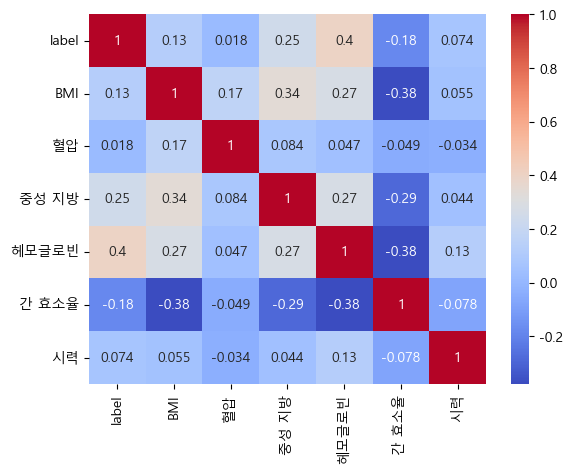

In [25]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
corr = health_data[['label','BMI','혈압','중성 지방','헤모글로빈','간 효소율','시력']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)


## 5. 관계 정리
- 강한 관계의 변수
- 약한 관계의 변수

In [ ]:
### 강한 관계를 보이는 변수에는 어떤 것이 있나요 ?
# 헤모글로빈, 중성 지방
# 흡연자에서 수치가 확실히 높음

In [ ]:
### 약한 관계를 보이는 변수에는 어떤 것이 있나요 ?
# 시력, BMI
# 통계적으로 유의하지 않거나 영향이 작음

## 5. 결론 도출
어떤 요인이 흡연 여부와 관련성이 높은지 인사이트 제시

예시)
- 흡연자는 비흡연자에 비해 평균 혈압과 중성지방 수치가 유의하게 높았습니다.(p<0.05)
- 반면, BMI는 유의한 차이가 없었습니다. (p>0.05)
- 따라서 흡연은 대사 관련 지표(혈압, 중성지방)에 더 큰 영향을 미치는 것으로 해석할 수 있습니다.

In [ ]:
### 어떤 요인이 흡연 여부와 관련성이 높을까요 ? 그 이유는?
#
'''
흡연자는 비흡연자보다 헤모글로빈, 중성 지방, 간 효소율이 유의하게 높음
이는 흡연으로 인한 산소 포화도 저하 
→ 적혈구 증가, 지질대사 영향, 간 해독 부담으로 해석 가능
반면 BMI, 시력은 직접적인 영향보다는 연령·성별 구성 차이 영향일 가능성이 큼

'''